In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
import statannot

# Compare DeepCellState variations

In [29]:
import seaborn as sns
sns.set()

In [30]:
res_dcs_noise = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_withnoise.csv',index_col=0)
res_dcs_noise['model'] = 'DCS'
res_dcs_nonoise = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_no_noise.csv',index_col=0)
res_dcs_nonoise['model'] = 'DCS modified v1'
res_notvae_2encs = pd.read_csv('../results/my_results/landmarks_10foldvalidation_notvae_results1000ep512bs.csv',index_col=0)
res_notvae_2encs['model'] = 'similarity-trained Autoencoders'
res_dcs_direct = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_direct_and_l2similarity.csv',index_col=0)
res_dcs_direct['model'] = 'DCS modified v2'
baseline = pd.read_csv('../results/baseline_evaluation_landmarks.csv',index_col=0)
baseline = baseline.drop_duplicates()

# add mi
# res_mi = pd.read_csv('../results/MI_results/landmarks_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs.csv',index_col=0)
# res_mi['model'] = 'Autoencoders with classifier'

In [31]:
# add TransCompRmixedANNS
# res_annTransCompR = pd.read_csv('../results/ANNmixedTransCompR_results/landmarks_10foldvalidation_ANNmixedTransCompR_500ep512bs_a375_ht29.csv',index_col=0)
# res_annTransCompR['model'] = 'TransCompR-combined and Autoencoders with classifier'

In [32]:
res_cpa = pd.read_csv('../results/MI_results/landmarks_10foldvalidation_withCPA_1000ep512bs_a375_ht29.csv',index_col=0)
res_cpa['model'] = 'CPA-based Autoencoders'

In [33]:
res_mi_class = pd.read_csv('../results/MI_results/landmarks_10foldvalidation_MI_l2sim_1000ep512bs_a375_ht29_with_class.csv',index_col=0)
res_mi_class['model'] = 'Autoencoders with classifier'
res_transCompR = pd.read_csv('../results/TransCompR_results/landmarks_10foldvalidation_transcompr_decoders_1000ep512bs_a375_ht29.csv',index_col=0)
res_transCompR['model'] = 'TransCompR'
res_fit = pd.read_csv('../results/FITmodel_results/landmarks_10foldvalidation_noReg_FIT_a375_ht29.csv',index_col=0)
res_fit['model'] = 'FIT'

In [34]:
# # add mi
# res_mi = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs_pc3_ha1e.csv',index_col=0)
# res_mi['model'] = 'Translation Model'

# res_mi_class = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_2000ep512bs_pc3_ha1e_withclass.csv',index_col=0)
# res_mi_class['model'] = 'Translation Model with classifier'

In [35]:
# res_dcs_noise = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_withnoise.csv',index_col=0)
# res_dcs_noise['model'] = 'DCS'
# res_dcs_nonoise = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_no_noise.csv',index_col=0)
# res_dcs_nonoise['model'] = 'DCS modified v1'
# res_notvae_2encs = pd.read_csv('../results/my_results/landmarks_10foldvalidation_vae_results1000ep512bs.csv',index_col=0)
# res_notvae_2encs['model'] = 'Two Autoencoders'
# res_dcs_direct = pd.read_csv('../results/deepcellstate_results/deepcellstate_landmarks_10foldvalidation_results300ep128bs_direct_and_l2similarity.csv',index_col=0)
# res_dcs_direct['model'] = 'DCS modified v2'
# baseline = pd.read_csv('../results/baseline_evaluation_landmarks.csv',index_col=0)
# baseline = baseline.drop_duplicates()

# # # add mi
# # res_mi = pd.read_csv('../results/MI_results/landmarks_10foldvalidation_pretrained_MIuniform_and_l2sim_2encs_1000ep512bs.csv',index_col=0)
# # res_mi['model'] = 'MI Autoencoders'

In [36]:
results = pd.concat([res_dcs_noise,res_dcs_nonoise,res_notvae_2encs,
                     res_dcs_direct,res_cpa,res_mi_class,
                     res_transCompR],axis=0)
#res_annTransCompR
results

,model_pearsonHT29,model_pearsonA375,model_spearHT29,model_spearA375,model_accHT29,model_accA375,recon_pear_ht29,recon_pear_a375,recon_spear_ht29,recon_spear_a375,...,recon_acc_a375,cross_corr_ht29,cross_corr_a375,Direct_pearson,Direct_spearman,DirectAcc_ht29,DirectAcc_a375,model,F1_score,ClassAccuracy
0,0.578932,0.571852,0.518443,0.515097,0.682975,0.684765,0.995590,0.995403,0.994586,0.993930,...,0.966121,0.992574,0.993121,0.520686,0.380998,0.662602,0.662602,DCS,NaN,NaN
1,0.533776,0.530438,0.465651,0.466992,0.665491,0.665210,0.995553,0.995315,0.994415,0.994196,...,0.966837,0.992372,0.992867,0.479417,0.541630,0.649719,0.649719,DCS,NaN,NaN
2,0.567735,0.561118,0.490919,0.488067,0.666232,0.665746,0.995337,0.995380,0.994434,0.994404,...,0.967825,0.991636,0.992053,0.500422,0.294198,0.644760,0.644760,DCS,NaN,NaN
3,0.499116,0.492172,0.437531,0.435180,0.653809,0.651815,0.995539,0.995497,0.994217,0.994197,...,0.967604,0.992338,0.993421,0.445524,0.183300,0.635813,0.635813,DCS,NaN,NaN
4,0.597630,0.588295,0.492726,0.482839,0.673185,0.667408,0.995768,0.995651,0.994716,0.994287,...,0.967664,0.992772,0.993688,0.542872,0.606137,0.652991,0.652991,DCS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.671906,0.643847,0.580660,0.563546,0.705905,0.698083,0.836056,0.826737,0.775817,0.757624,...,0.785804,NaN,NaN,NaN,NaN,NaN,NaN,TransCompR,NaN,NaN
6,0.654051,0.573666,0.538232,0.504965,0.684202,0.671063,0.839258,0.807436,0.771421,0.739063,...,0.772597,NaN,NaN,NaN,NaN,NaN,NaN,TransCompR,NaN,NaN
7,0.690229,0.629805,0.619533,0.568116,0.718047,0.697035,0.847227,0.798704,0.793351,0.730510,...,0.772111,NaN,NaN,NaN,NaN,NaN,NaN,TransCompR,NaN,NaN
8,0.613592,0.548584,0.486915,0.466506,0.662577,0.659151,0.816573,0.809566,0.755008,0.746443,...,0.778988,NaN,NaN,NaN,NaN,NaN,NaN,TransCompR,NaN,NaN


## A375 trasnlation

In [37]:
res_to_a375 = results.loc[:,['model_pearsonA375','model_spearA375','model_accA375','model']]
res_to_a375.columns = ['pearson','spearman','sign accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_a375']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','sign accuracy','model']
res_fit_a375 = res_fit.loc[:,['model_pearsonA375','model_spearA375','model_accA375','model']]
res_fit_a375.columns = ['pearson','spearman','sign accuracy','model']
res_to_a375 = pd.concat([res_to_a375,res_baseline,res_fit_a375],axis=0)
res_to_a375

,pearson,spearman,sign accuracy,model
0,0.571852,0.515097,0.684765,DCS
1,0.530438,0.466992,0.665210,DCS
2,0.561118,0.488067,0.665746,DCS
3,0.492172,0.435180,0.651815,DCS
4,0.588295,0.482839,0.667408,DCS
...,...,...,...,...
5,0.547381,0.664519,0.494479,FIT
6,0.502644,0.647955,0.441686,FIT
7,0.543432,0.665005,0.484165,FIT
8,0.482761,0.633972,0.414221,FIT


In [38]:
res_to_a375 = pd.melt(res_to_a375,id_vars=['model'])
res_to_a375.columns = ['model','metric','value']
res_to_a375

,model,metric,value
0,DCS,pearson,0.571852
1,DCS,pearson,0.530438
2,DCS,pearson,0.561118
3,DCS,pearson,0.492172
4,DCS,pearson,0.588295
...,...,...,...
265,FIT,sign accuracy,0.494479
266,FIT,sign accuracy,0.441686
267,FIT,sign accuracy,0.484165
268,FIT,sign accuracy,0.414221


In [39]:
plt.rcParams["figure.figsize"] = (8, 6)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


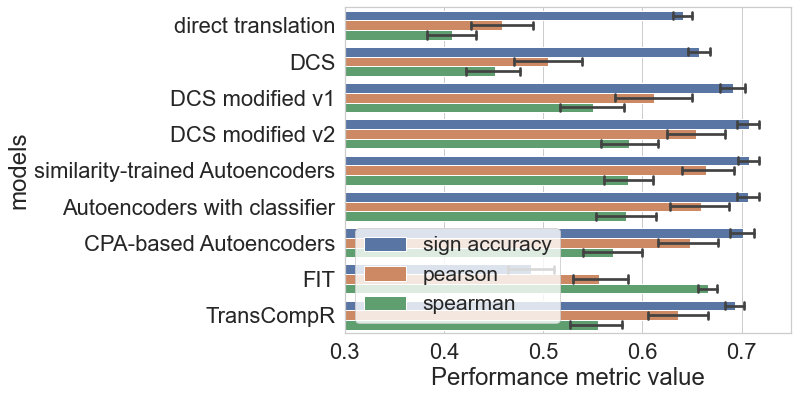

In [40]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_to_a375,
            order=['direct translation','DCS',
                   'DCS modified v1','DCS modified v2',
                   'similarity-trained Autoencoders','Autoencoders with classifier',
                   'CPA-based Autoencoders','FIT','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.xlim((0.3,0.75))
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='models')
# statannot.add_stat_annotation(ax=ax, 
#                               data=res_to_a375,
#                               y="value",
#                               x="model",
#                               order=['direct translation','DCS',
#                                      'DCS modified v1','DCS modified v2',
#                                      'similarity-trained Autoencoders','GAN-based Autoencoders',
#                                      'TransCompR-combined and GAN-based Autoencoders'],
#                               hue_order = ['accuracy','pearson','spearman'],
#                               hue="metric",
#                               box_pairs=[
#                                   (("DCS", "pearson"), ("similarity-trained Autoencoders","pearson"))],
#                               test="Mann-Whitney",
#                               loc = 'inside',
#                               verbose=0
#                              )
plt.savefig('../figures/MI_results/landmarks_autoencoders_compare_a375.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [41]:
from scipy import stats

In [42]:
models = ['DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders',
          'direct translation','Autoencoders with classifier',
          'CPA-based Autoencoders','FIT','TransCompR']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-42-f81326c34b3a>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-42-f81326c34b3a>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [43]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-43-2bb75a293747>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
<ipython-input-43-2bb75a293747>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values


In [44]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='sign accuracy'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-44-a9ff6e3ced82>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='sign accuracy'].value.values
<ipython-input-44-a9ff6e3ced82>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='sign accuracy'].value.values


In [45]:
a375_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_translate = a375_translate[['metric','DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','direct translation','FIT','TransCompR','Autoencoders with classifier','CPA-based Autoencoders']]
a375_translate.to_csv('../results/MI_results/landmarks_a375_autoencoders_comparison_translation_pvalues_table.csv')
a375_translate

,metric,DCS,DCS modified v1,DCS modified v2,similarity-trained Autoencoders,direct translation,FIT,TransCompR,Autoencoders with classifier,CPA-based Autoencoders
DCS,pearson,1.0,0.003611,0.000330,0.000183,0.088973,0.053903,0.000583,0.000246,0.000440
DCS modified v1,pearson,0.0,1.000000,0.212294,0.121225,0.000440,0.088973,0.384673,0.121225,0.241322
DCS modified v2,pearson,0.0,0.000000,1.000000,0.733730,0.000183,0.001315,0.570750,0.733730,0.909722
similarity-trained Autoencoders,pearson,0.0,0.000000,0.000000,1.000000,0.000183,0.000583,0.273036,0.850107,0.677585
direct translation,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.001008,0.000183,0.000183,0.000183
Autoencoders with classifier,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.001315,0.384673,1.000000,0.623176
CPA-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.001706,0.623176,0.000000,1.000000
FIT,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.004586,0.000000,0.000000
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
DCS,spearman,1.0,0.003611,0.000246,0.000246,0.037635,0.000183,0.001315,0.000246,0.001315


### Same but for reconstruction

In [46]:
res_recon_a375 = results.loc[:,['recon_pear_a375','recon_spear_a375','recon_acc_a375','model']]
res_recon_a375.columns = ['pearson','spearman','sign accuracy','model']
res_recon_a375

,pearson,spearman,sign accuracy,model
0,0.995403,0.993930,0.966121,DCS
1,0.995315,0.994196,0.966837,DCS
2,0.995380,0.994404,0.967825,DCS
3,0.995497,0.994197,0.967604,DCS
4,0.995651,0.994287,0.967664,DCS
...,...,...,...,...
5,0.826737,0.757624,0.785804,TransCompR
6,0.807436,0.739063,0.772597,TransCompR
7,0.798704,0.730510,0.772111,TransCompR
8,0.809566,0.746443,0.778988,TransCompR


In [47]:
res_recon_a375 = pd.melt(res_recon_a375,id_vars=['model'])
res_recon_a375.columns = ['model','metric','value']
res_recon_a375

,model,metric,value
0,DCS,pearson,0.995403
1,DCS,pearson,0.995315
2,DCS,pearson,0.995380
3,DCS,pearson,0.995497
4,DCS,pearson,0.995651
...,...,...,...
205,TransCompR,sign accuracy,0.785804
206,TransCompR,sign accuracy,0.772597
207,TransCompR,sign accuracy,0.772111
208,TransCompR,sign accuracy,0.778988


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


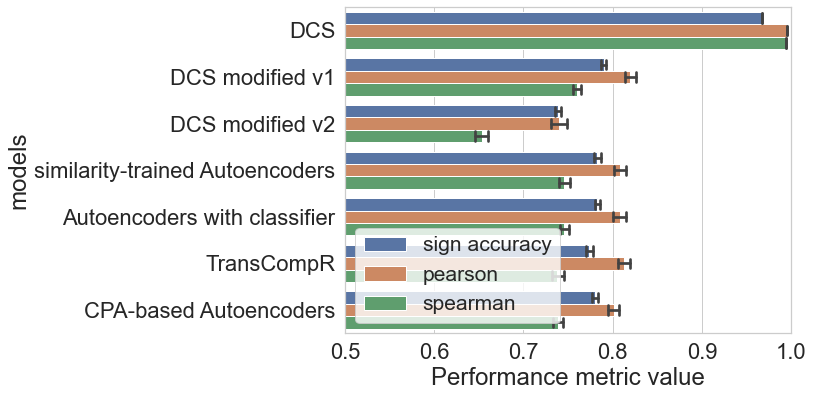

In [48]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_recon_a375,
            order=['DCS',
                   'DCS modified v1','DCS modified v2',
                   'similarity-trained Autoencoders','Autoencoders with classifier','TransCompR',
                   'CPA-based Autoencoders'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
plt.xlim((0.5,1.0))
plt.savefig('../figures/MI_results/landmarks_10fold_validation_reconstruction_autoencoders_comparison_a375.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [49]:
models = ['DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','Autoencoders with classifier',
          'TransCompR','CPA-based Autoencoders']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-49-4508850b9679>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-49-4508850b9679>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [50]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-50-db2d8645d6f5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
<ipython-input-50-db2d8645d6f5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values


In [76]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='sign accuracy'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-76-26171e6f1a72>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='sign accuracy'].value.values
<ipython-input-76-26171e6f1a72>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='sign accuracy'].value.values


In [77]:
a375_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_reconstruction = a375_reconstruction[['metric','DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','Autoencoders with classifier','TransCompR','CPA-based Autoencoders']]
a375_reconstruction.to_csv('../results/MI_results/landmarks_a375_autoencoders_comparison_reconstruction_pvalues_table.csv')
a375_reconstruction

,metric,DCS,DCS modified v1,DCS modified v2,similarity-trained Autoencoders,Autoencoders with classifier,TransCompR,CPA-based Autoencoders
DCS,pearson,1.0,0.003611,0.000330,0.000183,0.000246,0.000583,0.000440
DCS modified v1,pearson,0.0,1.000000,0.212294,0.121225,0.121225,0.384673,0.241322
DCS modified v2,pearson,0.0,0.000000,1.000000,0.733730,0.733730,0.570750,0.909722
similarity-trained Autoencoders,pearson,0.0,0.000000,0.000000,1.000000,0.850107,0.273036,0.677585
Autoencoders with classifier,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.384673,0.623176
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.623176
CPA-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,spearman,0.0,1.000000,0.000183,0.017257,0.001706,0.000583,0.000583
DCS modified v2,spearman,0.0,0.000000,1.000000,0.000183,0.000183,0.000183,0.000183


## HT29 trasnlation

In [78]:
res_to_ht29 = results.loc[:,['model_pearsonHT29','model_spearHT29','model_accHT29','model']]
res_to_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_ht29']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','sign accuracy','model']
res_fit_ht29 = res_fit.loc[:,['model_pearsonHT29','model_spearHT29','model_accHT29','model']]
res_fit_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_to_ht29 = pd.concat([res_to_ht29,res_baseline,res_fit_ht29],axis=0)
res_to_ht29

,pearson,spearman,sign accuracy,model
0,0.578932,0.518443,0.682975,DCS
1,0.533776,0.465651,0.665491,DCS
2,0.567735,0.490919,0.666232,DCS
3,0.499116,0.437531,0.653809,DCS
4,0.597630,0.492726,0.673185,DCS
...,...,...,...,...
5,0.571361,0.678604,0.514598,FIT
6,0.528955,0.651636,0.451843,FIT
7,0.582167,0.678425,0.514409,FIT
8,0.493124,0.634100,0.407729,FIT


In [79]:
res_to_ht29 = pd.melt(res_to_ht29,id_vars=['model'])
res_to_ht29.columns = ['model','metric','value']
res_to_ht29

,model,metric,value
0,DCS,pearson,0.578932
1,DCS,pearson,0.533776
2,DCS,pearson,0.567735
3,DCS,pearson,0.499116
4,DCS,pearson,0.597630
...,...,...,...
265,FIT,sign accuracy,0.514598
266,FIT,sign accuracy,0.451843
267,FIT,sign accuracy,0.514409
268,FIT,sign accuracy,0.407729


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


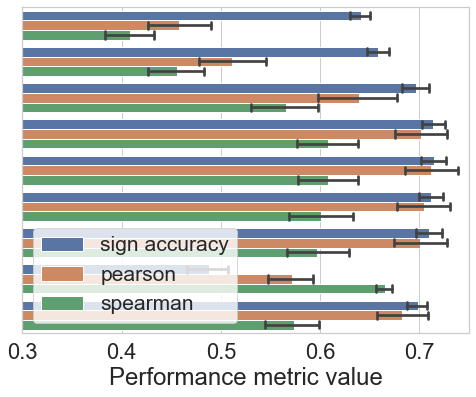

In [80]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_to_ht29,
            order=['direct translation','DCS',
                   'DCS modified v1','DCS modified v2',
                   'similarity-trained Autoencoders','Autoencoders with classifier',
                   'CPA-based Autoencoders','FIT','TransCompR'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='')
#plt.xticks(rotation=45)
plt.xlim(0.3,0.75)
plt.yticks([])
plt.savefig('../figures/MI_results/landmarks_10fold_validation_autoencoders_comparison_ht29.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [81]:
models = ['DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','direct translation','Autoencoders with classifier',
          'FIT','TransCompR','CPA-based Autoencoders']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-81-331afb6bc7e5>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
<ipython-input-81-331afb6bc7e5>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values


In [82]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-82-2b2bd44095e3>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
<ipython-input-82-2b2bd44095e3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values


In [83]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='sign accuracy'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-83-cfb7e48ca1ad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='sign accuracy'].value.values
<ipython-input-83-cfb7e48ca1ad>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='sign accuracy'].value.values


In [84]:
ht29_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_translate = ht29_translate[['metric','DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','direct translation','FIT','TransCompR','Autoencoders with classifier','CPA-based Autoencoders']]
ht29_translate.to_csv('../results/MI_results/landmarks_ht29_autoencoders_comparison_translation_pvalues_table.csv')
ht29_translate

,metric,DCS,DCS modified v1,DCS modified v2,similarity-trained Autoencoders,direct translation,FIT,TransCompR,Autoencoders with classifier,CPA-based Autoencoders
DCS,pearson,1.0,0.002202,0.000183,0.000183,0.075662,0.031209,0.000183,0.000183,0.000183
DCS modified v1,pearson,0.0,1.000000,0.045155,0.025748,0.000183,0.037635,0.185877,0.031209,0.037635
DCS modified v2,pearson,0.0,0.000000,1.000000,0.623176,0.000183,0.000183,0.384673,0.733730,0.909722
similarity-trained Autoencoders,pearson,0.0,0.000000,0.000000,1.000000,0.000183,0.000183,0.212294,0.520523,0.472676
direct translation,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.000583,0.000183,0.000183,0.000183
Autoencoders with classifier,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000183,0.307489,1.000000,0.733730
FIT,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000246,0.000000,0.000183
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.427355
CPA-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.001008,0.000183,0.000183,0.031209,0.000183,0.000440,0.000183,0.000246


### Same but for reconstruction

In [85]:
res_recon_ht29 = results.loc[:,['recon_pear_ht29','recon_spear_ht29','recon_acc_ht29','model']]
res_recon_ht29.columns = ['pearson','spearman','sign accuracy','model']
res_recon_ht29

,pearson,spearman,sign accuracy,model
0,0.995590,0.994586,0.968163,DCS
1,0.995553,0.994415,0.966193,DCS
2,0.995337,0.994434,0.966927,DCS
3,0.995539,0.994217,0.966732,DCS
4,0.995768,0.994716,0.970645,DCS
...,...,...,...,...
5,0.836056,0.775817,0.795901,TransCompR
6,0.839258,0.771421,0.794674,TransCompR
7,0.847227,0.793351,0.808412,TransCompR
8,0.816573,0.755008,0.784309,TransCompR


In [86]:
res_recon_ht29 = pd.melt(res_recon_ht29,id_vars=['model'])
res_recon_ht29.columns = ['model','metric','value']
res_recon_ht29

,model,metric,value
0,DCS,pearson,0.995590
1,DCS,pearson,0.995553
2,DCS,pearson,0.995337
3,DCS,pearson,0.995539
4,DCS,pearson,0.995768
...,...,...,...
205,TransCompR,sign accuracy,0.795901
206,TransCompR,sign accuracy,0.794674
207,TransCompR,sign accuracy,0.808412
208,TransCompR,sign accuracy,0.784309


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


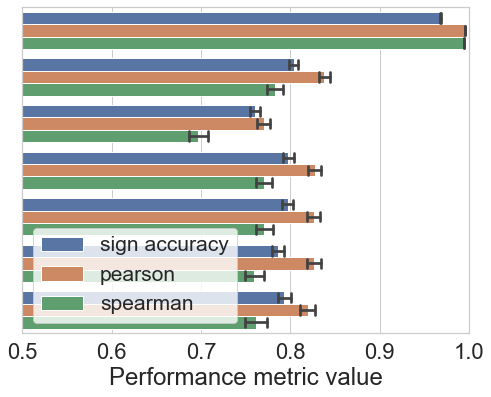

In [87]:
sns.set_theme(style="whitegrid",font_scale=2)
# plt.figure(figsize=(9,12), dpi= 80)
plt.figure()
ax = sns.barplot(x="value", y="model", data=res_recon_ht29,
            order=['DCS',
                   'DCS modified v1','DCS modified v2',
                   'similarity-trained Autoencoders','Autoencoders with classifier',
                   'TransCompR','CPA-based Autoencoders'],
            hue_order = ['sign accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left',prop={'size': 21})
plt.gca().set(title='', 
              xlabel = 'Performance metric value',
              ylabel='')
#plt.xticks(rotation=45)
plt.xlim(0.5,1.0)
plt.yticks([])
plt.savefig('../figures/MI_results/landmarks_10fold_validation_reconstruction_autoencoders_comparison_ht29.eps',
            papertype="a4",
            format='eps',
            bbox_inches='tight',dpi=600)

In [88]:
models = ['DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','Autoencoders with classifier',
          'TransCompR','CPA-based Autoencoders']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-88-68a6ceab595f>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
<ipython-input-88-68a6ceab595f>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values


In [89]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-89-d8298965d0b4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
<ipython-input-89-d8298965d0b4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values


In [90]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='sign accuracy'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='sign accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'sign accuracy'

<ipython-input-90-9d6d1f9e8d53>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='sign accuracy'].value.values
<ipython-input-90-9d6d1f9e8d53>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='sign accuracy'].value.values


In [91]:
ht29_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_reconstruction = ht29_reconstruction[['metric','DCS','DCS modified v1','DCS modified v2','similarity-trained Autoencoders','Autoencoders with classifier','TransCompR','CPA-based Autoencoders']]
ht29_reconstruction.to_csv('../results/MI_results/landmarks_ht29_autoencoders_comparison_reconstruction_pvalues_table.csv')
ht29_reconstruction

,metric,DCS,DCS modified v1,DCS modified v2,similarity-trained Autoencoders,Autoencoders with classifier,TransCompR,CPA-based Autoencoders
DCS,pearson,1.0,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,pearson,0.0,1.000000,0.000183,0.075662,0.053903,0.064022,0.003611
DCS modified v2,pearson,0.0,0.000000,1.000000,0.000183,0.000183,0.000183,0.000183
similarity-trained Autoencoders,pearson,0.0,0.000000,0.000000,1.000000,0.733730,0.623176,0.185877
Autoencoders with classifier,pearson,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.273036
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.273036
CPA-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
DCS,spearman,1.0,0.000183,0.000183,0.000183,0.000183,0.000183,0.000183
DCS modified v1,spearman,0.0,1.000000,0.000183,0.064022,0.104110,0.011330,0.031209
DCS modified v2,spearman,0.0,0.000000,1.000000,0.000183,0.000183,0.000183,0.000183
